# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis
---

## Computer Assignment 2 - Variational Autoencoders & Clustering
---
### <a style='color:red'> Due Date: 26.01.2021 </a>


### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* Variational Autoencoders (VAEs)
    * $\beta$-VAE
    * Conditional VAE (CVAE)
    * BONUS: Generating Pokemons
* Clustering
    * Spectral Clustering for Image Segmentation
    * Spectral Clustering vs. K-Means for Image Segmentation

#### Use as many cells as you need
#### אפשר גם לכתוב בעברית, אבל עדיף באנגלית

* Code Tasks are denoted with: <img src="https://img.icons8.com/color/48/000000/code.png">
* Questions (which you need to answer in a Markdown cell) are denoted with: <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png">

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
| Gonen Weiss         | gonen.weiss@campus.technion.ac.il | 312347982 |
| Alexander Balabanov | alexander.b@campus.technion.ac.il | 312775364 |


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: **100** (even with the bonus, the grade will not be above 100).
    * Example: if you got 5 points bonus, but you were right in all sections, your grade will still be 100 (and not 105).
    * Example: if you got 5 points bonus, and 6 points were deducted for wrong answers, your grade will be 99.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **BONUS**:
    * 5 points - completing the Pokemon task with *fully-connected* layers (black & white version)
    * 10 points - completing the Pokemon task with *convolutional* layers (RGB version)
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ee046202_wet2_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ee046202_wet2_id1_id2.zip` with content:
        * `ee046202_wet2_id1_id2.ipynb` - the code tasks
        * `ee046202_wet2_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/cute-clipart/64/000000/info.png" style="height:50px;display:inline"> Tip
---
If you find it more convenient, you can copy the section to a new cell, and answer the question or rite the code just right below it. For example:

#### Question 0
1. What is the best course in the Technion?
2. Why does no one pick Bulbasaur as first pokemon?
3. Why is there no superhero named Catman?

#### Answers - Q0

#### Q0 - Section 1
* Q: What is the best course in the Technion?

In [ ]:
print("ANAM!")

#### Q0 - Section 2
* Q: Why does no one pick Bulbasaur as first pokemon?

It is really a riddle....

#### Q0 - Section 3
* Q: Why is there no superhero named Catman?

I got nothing.

### <img src="https://img.icons8.com/cotton/64/000000/grand-master-key.png" style="height:50px;display:inline"> Part 1 - Variational Autoencoders - Prologue
---
In this section of the exercise we will analyze the VAE and introduce an enhacement called $\beta$-VAE and also a variation of VAE that allows us some control over the latent space using conditional probability - Conditional Variational Autoencoder.

For this part, you are provided the original implementation of the VAE from the tutorial. You will have to modify it throughout the tasks (yes yes, you can copy-paste from the original implementation).
* **Note** - for better results you should tune the model!
    * You can add layers / hidden units / different activations (ReLU, TanH, LeakyReLU, Sigmoid...)
    * You can choose a different optimizer than Adam (SGD, RMSProp...), tune the learning rate...
    * You can change the reconstruction loss (BCE, MSE, L1...)
    * Other hyper-parameters like the batch-size, number of epochs and etc...

We recommend running this part on Google Colab or on a GPU (if you have an access to one). Note that running on a GPU will lead to about x2 speedup in training. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/'My Drive'/IPA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IPA


In [3]:
# imports for the exrcise - part 1
# you can add more if you wish (but it is not really needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import glob

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from torchvision import transforms
import torchvision

from PIL import Image


In [4]:
# the original implementation from the tutorial - leave untouched (for your own sake), 
# copy-paste what you need to another cell

# reparametrization trick
def reparameterize(mu, logvar, device=torch.device("cpu")):
    """
    This function applies the reparameterization trick:
    z = mu(X) + sigma(X)^0.5 * epsilon, where epsilon ~ N(0,I)
    :param mu: mean of x
    :param logvar: log variance of x
    :param device: device to perform calculations on
    :return z: the sampled latent variable
    """
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std).to(device)
    return mu + eps * std


# encoder - Q(z|X)
class VaeEncoder(torch.nn.Module):
    """
       This class builds the encoder for the VAE
       :param x_dim: input dimensions
       :param hidden_size: hidden layer size
       :param z_dim: latent dimensions
       :param device: cpu or gpu
       """

    def __init__(self, x_dim=28*28, hidden_size=256, z_dim=10, device=torch.device("cpu")):
        super(VaeEncoder, self).__init__()
        self.x_dim = x_dim
        self.hidden_size = hidden_size
        self.z_dim = z_dim
        self.device = device
        
        self.features = nn.Sequential(nn.Linear(x_dim, self.hidden_size),
                                      nn.ReLU())
        
        self.fc1 = nn.Linear(self.hidden_size, self.z_dim, bias=True)  # fully-connected to output mu
        self.fc2 = nn.Linear(self.hidden_size, self.z_dim, bias=True)  # fully-connected to output logvar


    def bottleneck(self, h):
        """
        This function takes features from the encoder and outputs mu, log-var and a latent space vector z
        :param h: features from the encoder
        :return: z, mu, log-variance
        """
        mu, logvar = self.fc1(h), self.fc2(h)
        # use the reparametrization trick as torch.normal(mu, logvar.exp()) is not differentiable
        z = reparameterize(mu, logvar, device=self.device)
        return z, mu, logvar

    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        z, mu, logvar = VaeEncoder(X)
        """
        h = self.features(x)
        z, mu, logvar = self.bottleneck(h)
        return z, mu, logvar

    
class VaeDecoder(torch.nn.Module):
    """
       This class builds the decoder for the VAE
       :param x_dim: input dimensions
       :param hidden_size: hidden layer size
       :param z_dim: latent dimensions
       """

    def __init__(self, x_dim=28*28, hidden_size=256, z_dim=10):
        super(VaeDecoder, self).__init__()
        self.x_dim = x_dim
        self.hidden_size = hidden_size
        self.z_dim = z_dim
        
        self.decoder = nn.Sequential(nn.Linear(self.z_dim, self.hidden_size),
                                     nn.ReLU(),
                                     nn.Linear(self.hidden_size, self.x_dim),
                                     nn.Sigmoid())
        # why we use sigmoid? becaue the pixel values of images are in [0,1] and sigmoid(x) does just that!
        # if you don't work with images, you don't have to use that.


    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        x_reconstruction = VaeDecoder(z)
        """
        x = self.decoder(x)
        return x
    

class Vae(torch.nn.Module):
    def __init__(self, x_dim=28*28, z_dim=10, hidden_size=256, device=torch.device("cpu")):
        super(Vae, self).__init__()
        self.device = device
        self.z_dim = z_dim

        self.encoder = VaeEncoder(x_dim, hidden_size, z_dim=z_dim, device=device)
        self.decoder = VaeDecoder(x_dim, hidden_size, z_dim=z_dim)

    def encode(self, x):
        z, mu, logvar = self.encoder(x)
        return z, mu, logvar

    def decode(self, z):
        x = self.decoder(z)
        return x

    def sample(self, num_samples=1):
        """
        This functions generates new data by sampling random variables and decoding them.
        Vae.sample() actually generatess new data!
        Sample z ~ N(0,1)
        """
        z = torch.randn(num_samples, self.z_dim).to(self.device)
        return self.decode(z)

    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        return x_recon, mu, logvar, z = Vae(X)
        """
        z, mu, logvar = self.encode(x)
        x_recon = self.decode(z)
        return x_recon, mu, logvar, z
    

def loss_function(recon_x, x, mu, logvar, loss_type='bce'):
    """
    This function calculates the loss of the VAE.
    loss = reconstruction_loss - 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    :param recon_x: the reconstruction from the decoder
    :param x: the original input
    :param mu: the mean given X, from the encoder
    :param logvar: the log-variance given X, from the encoder
    :param loss_type: type of loss function - 'mse', 'l1', 'bce'
    :return: VAE loss
    """
    if loss_type == 'mse':
        recon_error = F.mse_loss(recon_x, x, reduction='sum')
    elif loss_type == 'l1':
        recon_error = F.l1_loss(recon_x, x, reduction='sum')
    elif loss_type == 'bce':
        recon_error = F.binary_cross_entropy(recon_x, x, reduction='sum')
    else:
        raise NotImplementedError

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return (recon_error + kl) / x.size(0)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - $\beta$-VAE
---
In the standard VAE an isotropic Gaussian ($p(z) \sim \mathcal{N}(0, I)$) is typically assumed as the prior distribution for z. Note that under this distribution the components of z are independent (e.g. disentangled - a disentangled representation can be defined as one where single latent units are sensitive to changes in single generative factors, while being relatively invariant to changes in other factors) which is exactly the property we would like our approximate posterior distribution (e.g. $q(z|x)$) to have. Thus, to encourage independence we increase the KL-divergence term in the ELBO by a factor of $\beta$: $$ \mathcal{L}_{\beta-VAE} = -\mathbb{E}_{q_{\phi(z|x)}}[p_{\theta}(x|z)] + \beta \cdot D_{KL}[q_{\theta}(z|x) || p(z)]  $$
   * Training is performed exactly the same as for the standard VAE.
   * When $\beta=1$, it is same as VAE.
   * When $\beta>1$, it applies a stronger constraint on the latent bottleneck and limits the representation capacity of $z$. 
       * For some conditionally independent generative factors, keeping them disentangled is the most efficient representation.
   * When $0<\beta<1$, it can be interpreted as optimizing an approximate log marginal likelihood bound under an alternative prior, regularized to prevent degeneracy (of the KL-divergence).
   
The tasks:
1. Modify the loss function to support $\beta$-VAE. The function should return the reconstruction loss, the kl-divergence (**without the multiplication by $\beta$**) and and the total loss.
    * The signature of the function should be: `beta_loss_function(recon_x, x, mu, logvar, loss_type='bce', beta=1)`
    * The reconstruction loss, the kl-divergence and and the total loss should be normalzied by the batch size.
    * The returned reconstruction loss and kl-divergence should be converted to numpy: `kl_d.data.cpu().numpy()` (but only them, not the total loss)
2. Load the MNIST dataset, as in the tutorial, and create a train loader.
3. For $\beta=[0.05, 0.5, 1, 5]$, train a $\beta$-VAE for 50 epochs and keep track of:
    * The average reconstruction loss in each epoch
    * The average KL-divergence in each epoch
    * A checkpoint of the network in the format: `beta_(value of beta)_vae_50_epochs.pth` (there is an example in the tutorial)
    * This may take a while, so go grab a coffee in the meantime :)
4. For $\beta=[0.05, 0.5, 1, 5]$, plot the KL-divergence and reconstruction error vs. epochs.
5. For $\beta=[0.05, 0.5, 1, 5]$, generate 5 samples from the VAE and plot them (`imshow`...). Run this a couple of times to get an impression of the samples for each $\beta$.


* Notes:
    * Be organized - separate to different code cells if it keeps you organized.
    * Make sure to properly define the hyper-parameters (see tutorial), and define the `device` automatically. Don't forget to send all the models and tensors to the device. We will run your code on a GPU.
    * If you are not satisfied with the results, and you have time, you can try and increase the number of epochs to 100, and see what happens.

In [5]:
def reparameterize(mu, logvar, device=torch.device("cpu")):
    """
    This function applies the reparameterization trick:
    z = mu(X) + sigma(X)^0.5 * epsilon, where epsilon ~ N(0,I)
    :param mu: mean of x
    :param logvar: log variance of x
    :param device: device to perform calculations on
    :return z: the sampled latent variable
    """
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std).to(device)
    return mu + eps * std

In [6]:
# encoder - Q(z|X)
class VaeEncoder(torch.nn.Module):
    """
       This class builds the encoder for the VAE
       :param x_dim: input dimensions
       :param hidden_size: hidden layer size
       :param z_dim: latent dimensions
       :param device: cpu or gpu
       """

    #def __init__(self, x_dim=28*28, hidden_size=256, z_dim=10, device=torch.device("cpu")):
    def __init__(self, layers=[28*28, 256,10], activation=[], device=torch.device("cpu")):
        super(VaeEncoder, self).__init__()
        self.layers = [] # Set the layers in order
        if len(activation) != len(layers)-2: # In case activation layers weren't implicitly set
                activation = [nn.ReLU()] *(len(layers)-2)
        for i in range(1, len(layers)-1): # Layer and activation
            self.layers.append(nn.Linear(layers[i-1], layers[i]))
            self.layers.append(activation[i-1])

        self.features = nn.Sequential(*self.layers) # All of the layers in sequence
            
        self.device = device
        
        self.fc1 = nn.Linear(layers[-2], layers[-1], bias=True)  # fully-connected to output mu
        self.fc2 = nn.Linear(layers[-2], layers[-1], bias=True)  # fully-connected to output logvar


    def bottleneck(self, h):
        """
        This function takes features from the encoder and outputs mu, log-var and a latent space vector z
        :param h: features from the encoder
        :return: z, mu, log-variance
        """
        mu, logvar = self.fc1(h), self.fc2(h)
        # use the reparametrization trick as torch.normal(mu, logvar.exp()) is not differentiable
        z = reparameterize(mu, logvar, device=self.device)
        return z, mu, logvar

    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        z, mu, logvar = VaeEncoder(X)
        """
        h = self.features(x)
        z, mu, logvar = self.bottleneck(h)
        return z, mu, logvar


In [7]:

class VaeDecoder(torch.nn.Module):

    """
      This class builds the decoder for the VAE
      :param x_dim: input dimensions
      :param hidden_size: hidden layer size
      :param z_dim: latent dimensions
      """
    def __init__(self, layers=[10, 256,28*28], activation=[]):
        super(VaeDecoder, self).__init__()
        
        self.layers = [] # Set the layers
        if len(activation) != len(layers): # In case activation layers weren't implicitly set
            activation = [nn.ReLU()] * (len(layers)-2)
        activation.append(nn.Sigmoid()) # Output 0-1
            
        for i in range(1, len(layers)): #chain the layer and activation together
            self.layers.append(nn.Linear(layers[i-1], layers[i]))
            self.layers.append(activation[i-1])
            
        self.decoder = nn.Sequential(*self.layers)
        
        # why we use sigmoid? becaue the pixel values of images are in [0,1] and sigmoid(x) does just that!
        # if you don't work with images, you don't have to use that.


    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        x_reconstruction = VaeDecoder(z)
        """
        x = self.decoder(x)
        return x
    

In [8]:
class bVae(torch.nn.Module):
    def __init__(self, layers=[28*28, 256,10], activation=[], device=torch.device("cpu")):
        super(bVae, self).__init__()
        self.device = device
        self.z_dim = layers[-1]

        self.encoder = VaeEncoder(layers, activation, device=device) # Set encoder
        self.decoder = VaeDecoder(layers[::-1], activation) # Set decoder in reverse order of layers

    def encode(self, x):
        z, mu, logvar = self.encoder(x)
        return z, mu, logvar

    def decode(self, z):
        x = self.decoder(z)
        return x

    def sample(self, num_samples=1):
        """
        This functions generates new data by sampling random variables and decoding them.
        Vae.sample() actually generatess new data!
        Sample z ~ N(0,1)
        """
        z = torch.randn(num_samples, self.z_dim).to(self.device)
        return self.decode(z)

    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        return x_recon, mu, logvar, z = Vae(X)
        """
        z, mu, logvar = self.encode(x)
        x_recon = self.decode(z)
        return x_recon, mu, logvar, z
    

In [9]:
def loss_function(recon_x, x, mu, logvar, loss_type='bce', beta=1):
    """
    This function calculates the loss of the VAE.
    loss = reconstruction_loss - 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    :param recon_x: the reconstruction from the decoder
    :param x: the original input
    :param mu: the mean given X, from the encoder
    :param logvar: the log-variance given X, from the encoder
    :param loss_type: type of loss function - 'mse', 'l1', 'bce'
    :return: VAE loss
    """
    if loss_type == 'mse':
        recon_error = F.mse_loss(recon_x, x, reduction='sum')
    elif loss_type == 'l1':
        recon_error = F.l1_loss(recon_x, x, reduction='sum')
    elif loss_type == 'bce':
        recon_error = F.binary_cross_entropy(recon_x, x, reduction='sum')
    else:
        raise NotImplementedError

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_error / x.size(0), kl / x.size(0), (recon_error + (beta * kl)) / x.size(0)

In [10]:
def get_dataset(dataset=torchvision.datasets.MNIST, batch_size=128, test=False):
    # Gets the dataset
    dataset = dataset(root='./datasets/',
                            train=not test, 
                            transform=torchvision.transforms.ToTensor(),
                            download=True)
    loader = torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=batch_size, 
                                        shuffle=True, drop_last=True)

    
    return loader
    

In [11]:
def model_name(beta, epochs, comment=""): #constant nameing practice
    f = r'./bVae_b-{:.2f}_epochs-{}{}.pth'.format(beta, str(epochs).zfill(3), "_"+comment if comment else "")
    return f


In [12]:
# hyper-parameters:
hyp_par = {'epochs':75,
           'batch': 32,
           'lr': 0.001,
           'layers': [28*28, 256, 128, 16]
          }

train_loader = get_dataset(batch_size=hyp_par['batch']) #Get MNIST dataset

# create model, send it to device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [13]:
betas = [0.05, 0.5, 1.5]
results = [] # Save the epoch errors across all training

print("Start training. Running calculations on: ", device)
for b in betas: # Do the same for each beta value
    model = bVae(layers=hyp_par['layers'], device=device).to(device) #b-VAE model
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=hyp_par['lr'])    
    for epoch in range(hyp_par['epochs']): # repeat for all epochs
        time_start = time.time()
        err_epoch = [] # Error for the epoch
        optimizer.param_groups[0]['lr'] = hyp_par['lr'] * 0.8 ** (epoch//5) #decrease learning rate

        for i, batch in enumerate(train_loader):
            x = batch[0].to(device).view(hyp_par['batch'], -1)
            x_rec, mu, logvar, z = model(x) 
            err_rec, err_kl, err = loss_function(x_rec, x, mu, logvar,loss_type='bce', beta=b)
            
            err_epoch.append([err_rec, err_kl, err]) # Add the errors from current batch
            
            # The magic 3
            optimizer.zero_grad()
            err.backward()
            optimizer.step()
            
        d = {'beta' : b, 'epoch' : epoch} # Dictionary for the epoch
        d['err_rec'], d['err_kl'], d['err'] = torch.mean(torch.Tensor(err_epoch), 0).data.cpu().numpy() # mean errors
        print("For beta: {} - epoch: {} training loss: {:.5f} epoch time: {:.3f} sec".
              format(b, epoch, d['err'],time.time() - time_start))
        results.append(d) # Add epoch dictionary to the database
        
    
    fname = model_name(b, hyp_par['epochs']) # Generate model name
    torch.save(model.state_dict(), fname) # Save model
    print("saved checkpoint @", fname)

Start training. Running calculations on:  cuda:0
For beta: 0.05 - epoch: 0 training loss: 126.47433 epoch time: 11.885 sec
For beta: 0.05 - epoch: 1 training loss: 88.04107 epoch time: 11.783 sec
For beta: 0.05 - epoch: 2 training loss: 81.51095 epoch time: 11.881 sec
For beta: 0.05 - epoch: 3 training loss: 78.68069 epoch time: 12.121 sec
For beta: 0.05 - epoch: 4 training loss: 77.02996 epoch time: 11.989 sec
For beta: 0.05 - epoch: 5 training loss: 75.33876 epoch time: 11.985 sec
For beta: 0.05 - epoch: 6 training loss: 74.64088 epoch time: 12.038 sec
For beta: 0.05 - epoch: 7 training loss: 74.05448 epoch time: 11.926 sec
For beta: 0.05 - epoch: 8 training loss: 73.61500 epoch time: 12.007 sec
For beta: 0.05 - epoch: 9 training loss: 73.18295 epoch time: 11.922 sec
For beta: 0.05 - epoch: 10 training loss: 72.35922 epoch time: 11.922 sec
For beta: 0.05 - epoch: 11 training loss: 72.09548 epoch time: 12.056 sec
For beta: 0.05 - epoch: 12 training loss: 71.90452 epoch time: 12.006 se

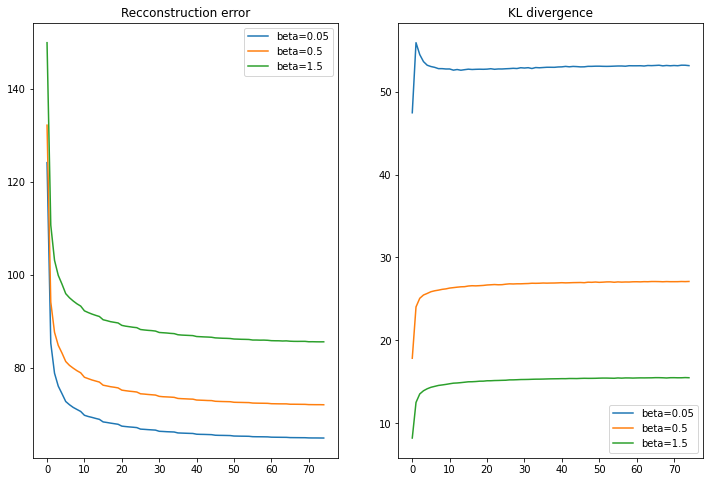

In [14]:
results = pd.DataFrame(results) # Create a dataframe with all epoch results
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Recconstruction error")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("KL divergence")
for b in betas:
    rec = results.loc[results['beta']==b, 'err_rec'] # Recconstruction error for current beta
    kl = results.loc[results['beta']==b, 'err_kl'] # KL error for current beta
    ax1.plot(range(hyp_par['epochs']), rec, label=r'beta={}'.format(b))
    ax2.plot(range(hyp_par['epochs']), kl, label=r'beta={}'.format(b))
ax1.legend()
ax2.legend()
    

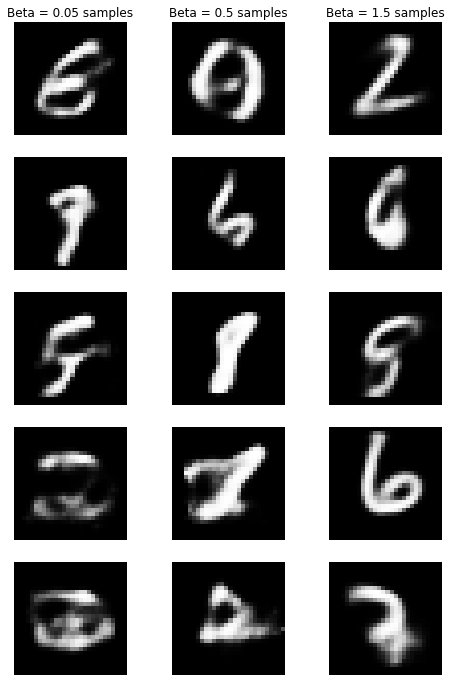

In [15]:
fig = plt.figure(figsize=(8,12))
samples_num = 5
for i, b in enumerate(betas):
    mod = bVae(layers=hyp_par['layers'], device=device).to(device)
    mod.load_state_dict(torch.load(model_name(b, hyp_par['epochs']))) # Load the model with corresponding beta
    mod.eval()
    samples = mod.sample(num_samples=samples_num).view(samples_num, 28, 28).data.cpu().numpy() # Generate samples
    for j in range(samples_num):
        ax = fig.add_subplot(5, 3, i + j*len(betas) +1)
        if j == 0:
            ax.set_title(r'Beta = {} samples'.format(b))
            
        ax.imshow(samples[j], cmap='gray')
        ax.set_axis_off()
        

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Question 1 - $\beta$-VAE
---
We will now analyze the results. Answer the following questions:
1. Explain intuitively the loss function of $\beta$-VAE. In your answer, explain the trade-off between the reconstruction loss and the KL-divergence and how it is affected by the $\beta$ parameter. Hint: think about regularization as you learned in the ML course (for example, in linear regression).
2. What is the main trend in the KL and reconstruction loss vs. epochs? In your answer, you should compare between the $\beta$'s.
3. For what values of $\beta$ you would expect better reconstruction (why would we want better reconstruction?) and for what values you would expect higher-quality samples? In your answer, refer to the blurriness in the samples you plotted.
4. Run the cell where you plot the samples (if you separated the cells for each $\beta$, then run all of them) a couple of times (just hit Ctrl + Enter). For which value of $\beta$ there is more *diversity* in the samples? (i.e., if out of 6 samples you get four 9's, it is not diverse).

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution 1 - $\beta$-VAE
---
1. $\beta$-VAE has an additional control over the learning progress.
The value of $\beta$ will determine how much we consider Normal distribution important.
For example $\beta=0.05$ will result in taking KL-divergence lightly and will result the latent space to distribute however it does instead of normally $N  \text{ ~ }(0,I)$.
Focusing mainly on reconstruction will result in good results for know data, training data. 
However it will hinder us in sampling, which is assuming normal distribution. Clearly seen in the samplimg results.
Similarly to ML that uses regularizition factors to avoid over fitting. KL-div helps the VAE keep a latent space that isn't too complex and hopfully help generalize to new unseen data.

2. Unsuprisingly a ragularization facor will result in an inverse corralation to the reconstraction loss.
Clearly seen in the graph "Loss over epochs" that shows the progress of both reconstruction and KL loss. High $\beta$ values will result in higher similarity to nornal dist. in the latent space and hence lower KL loss.
Obviously it comes at price, in the simillarity of the reconstrcution to the original, and vice versa.

3. As stated in the previous senction, low $\beta$ values ($\beta = 0.05$) will result in better reconstruction. Since the loss function is taking it in a higher regard. However the sample from the latent space will be bad (as seen in the samples) and we will expect a good sampling abilities from high $\beta$ values ($\beta = 1.5$).

4. 

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - Conditional VAE (CVAE)
---
Conditional Variational Autoencoder (CVAE) is an extension of Variational Autoencoder (VAE).
However, as you may have noticed, we have no control on the data generation process on VAE. That is, for example, on MNIST, we could not control the latent space, and when we sampled, we would not know what digit would be generated. This could be problematic if we want to generate some specific data. As an example, suppose we want to convert a unicode character to handwriting. In vanilla VAE, there is no way to generate the handwriting based on the character that the user inputted. Concretely, suppose the user inputted character ‘2’, how do we generate handwriting image that is a character ‘2’? We couldn’t.

Hence, CVAE was developed. Whereas VAE essentially models latent variables and data directly, CVAE models lantent variables and data, both conditioned to some random variables.
Recall, on VAE, the objective is:
$$\log P(X) -  D_{KL}[Q(z|X) || P(z|X)]  =  \mathbb{E}_{Q(z|X)}[\log P(X|z)] -D_{KL}[Q(z|X)|| P(z)]  $$
that is, we want to optimize the log likelihood of our data $P(X)$ under some “encoding” error. The original VAE model has two parts: the encoder $Q(x|Z)$ and the decoder $P(X|z)$.

If we focus on the encoder, it models the latent variable $z$ directly based on $X$, and it doesn't care about the different types of $X$ (e.g., it doesn't care if it is 1 or an 8). But wait, this was all the idea of **unsupervised learning**, we have no access to labels. Well, in this case, we have some information (thus, CVAE is sometimes referred to as **semi-supervised** learning model).

Similarly, in the decoder part, it only models $X$ directly based on the latent variable $z$. So, how do we tell the VAE what we want to generate? We can condition encoder and decoder to another things, let's denote them with $c$ (for "condition").

* The encoder is now conditioned on 2 variables- $X, c$: $Q(z|X,c)$ and the decoder in now conditioned on- $z$, $c$: $P(X|z,c)$
* Hence, our variational lower bound objective is now in this following form: $$ \log P(X|c) -  D_{KL}[Q(z|X,c) || P(z|X,c)]  =  \mathbb{E}_{Q(z|X,c)}[\log P(X|z,c)] -D_{KL}[Q(z|X,c)|| P(z|c)] $$ (we just conditioned all of the distributions with a variable $c$)
* So what is different? Almost nothing! We still model $P(z|c) \sim \mathcal{N}(0,I)$, and the rest are modeled by the neural network.
* But how is it done in practice? Simple! **Concatenation**: instead of encoding $X$, we encoded $[X,c]$, that is, we concatenate them. Same for the decoder: we take the latent variable $z$ and concatenate with $c$ and then the input of the decoder is $[z,c]$.
* In PyTorch, we concatenate with `x = torch.cat([x, x_cond], dim=1)` (the 0 dimension is the batch dimension).

The tasks:
* Load the Fashion-MNIST dataset, as in the tuorial, and create a train loader. Note that you get both the images and their **labels**.
* The labels are the classes (0-9). In order to use them in the network we need to convert them to one-hot vectors (0 -> [1,0,0,0,0,0,0,0,0,0], 1 -> [0,1,0,0,0,0,0,0,0,0] ...). The length of the one hot vector in as the number of classes. You are given a function that converts ints to one-hot vectors, use it on the labels, before you perform the concatenation.
* Modify the VAE architecture to support conditionals.
    * Copy-paste the skeleton (the original VAE, from the begining of the tutorial), and just modify the current functions. Note that there **are very few** changes needed.
    * Here are some tips, but feel free to implement as you wish, as long as it works:
        * In Python, you can let a function input be `None`, and then if the user inputs something that is not `None`, the function would act different. Here is an example: `def encode(x, x_cond=None): if x_cond is not None: ...`
        * Here are the parts that we recommend you change:
            * In the Vae module:
                * `def __init__(self, x_dim=28*28, z_dim=10, hidden_size=256, device=torch.device("cpu"), cond_dim=None)`
                * `def sample(self, num_samples=1, x_cond=None)`
                * `def forward(self, x, x_cond=None)`
            * Note that these are the minimal changes that can be done to implement VAE that supports CVAE. No need to modify VaeEncoder and VaeDecoder when we are using fully-connected layers. However, if we were to use convolutional layers, we would have to change also the encoder and decoder since convolutional layers work on images, and only after the images features from the convolutional layers have been extracted, we would concatenate the the condional $c$ (just before the fully-connected layers that output $\mu, \sigma$.
* Train CVAE on the Fashion-MNIST dataset (100 epochs, at least). Use $\beta$-VAE loss function (it shouldn't have changed from the regular VAE. Save a checkpoint of the network in the format: `fmnist_beta_(value of beta)_cvae_(number of epochs)_epochs.pth`. The rest of the hyper-parameters are up to you.
* Plot $n_{samples}=6$ from the CVAE for 6 classes of your choosing.
* **Tip**: this may take a while, so if everything seems to work, let it run on Google Colab and go grab another coffee.

In [16]:
def labels_to_one_hots(batch, num_classes=10):
    """
    Converts batch of integes numbers to one-hot vector given the vector length
    :param batch: batch of values to convert
    :param num_classes: length of the vector
    :return: one_hot_batch
    """
    one_hot_batch = torch.zeros(batch.size(0), num_classes).to(batch.device)
    for i in range(batch.size(0)):
        one_hot_batch[i, int(batch[i].data.cpu().item())] = 1
    return one_hot_batch

In [17]:
# encoder - Q(z|X)
class VaeEncoder(torch.nn.Module):
    """
       This class builds the encoder for the VAE
       :param x_dim: input dimensions
       :param hidden_size: hidden layer size
       :param z_dim: latent dimensions
       :param device: cpu or gpu
       """

    def __init__(self, x_dim=28*28, hidden_size=256, z_dim=10, device=torch.device("cpu")):
        super(VaeEncoder, self).__init__()
        self.x_dim = x_dim
        self.hidden_size = hidden_size
        self.z_dim = z_dim
        self.device = device
        
        self.features = nn.Sequential(nn.Linear(x_dim, self.hidden_size),
                                      nn.ReLU())
        
        self.fc1 = nn.Linear(self.hidden_size, self.z_dim, bias=True)  # fully-connected to output mu
        self.fc2 = nn.Linear(self.hidden_size, self.z_dim, bias=True)  # fully-connected to output logvar


    def bottleneck(self, h):
        """
        This function takes features from the encoder and outputs mu, log-var and a latent space vector z
        :param h: features from the encoder
        :return: z, mu, log-variance
        """
        mu, logvar = self.fc1(h), self.fc2(h)
        # use the reparametrization trick as torch.normal(mu, logvar.exp()) is not differentiable
        z = reparameterize(mu, logvar, device=self.device)
        return z, mu, logvar

    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        z, mu, logvar = VaeEncoder(X)
        """
        h = self.features(x)
        z, mu, logvar = self.bottleneck(h)
        return z, mu, logvar

    
class VaeDecoder(torch.nn.Module):
    """
       This class builds the decoder for the VAE
       :param x_dim: input dimensions
       :param hidden_size: hidden layer size
       :param z_dim: latent dimensions
       """

    def __init__(self, x_dim=28*28, hidden_size=256, z_dim=10):
        super(VaeDecoder, self).__init__()
        self.x_dim = x_dim
        self.hidden_size = hidden_size
        self.z_dim = z_dim
        
        self.decoder = nn.Sequential(nn.Linear(self.z_dim, self.hidden_size),
                                     nn.ReLU(),
                                     nn.Linear(self.hidden_size, self.x_dim),
                                     nn.Sigmoid())
        # why we use sigmoid? becaue the pixel values of images are in [0,1] and sigmoid(x) does just that!
        # if you don't work with images, you don't have to use that.


    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        x_reconstruction = VaeDecoder(z)
        """
        x = self.decoder(x)
        return x
    

class cVae(torch.nn.Module):
    def __init__(self, x_dim=28*28, z_dim=10, hidden_size=256, device=torch.device("cpu"), cond_dim=None):
        super(cVae, self).__init__()
        self.device = device
        self.z_dim = z_dim
        
        # Decoder will get an additional info as the class vector
        self.encoder = VaeEncoder(x_dim, hidden_size, z_dim=z_dim, device=device)
        self.decoder = VaeDecoder(x_dim, hidden_size, z_dim=z_dim + cond_dim if cond_dim else 0)

    def encode(self, x):
        z, mu, logvar = self.encoder(x)
        return z, mu, logvar

    def decode(self, z):
        x = self.decoder(z)
        return x

    def sample(self, num_samples=1, x_cond=None):
        """
        This functions generates new data by sampling random variables and decoding them.
        Vae.sample() actually generatess new data!
        Sample z ~ N(0,1)
        """
        z = torch.randn(num_samples, self.z_dim).to(self.device)
        if x_cond is not None: # Concatenate the class vector to the random latent space state
            z = torch.cat([z, x_cond], dim=1)
        return self.decode(z)

    def forward(self, x, x_cond=None):
        """
        This is the function called when doing the forward pass:
        return x_recon, mu, logvar, z = Vae(X)
        """
        z, mu, logvar = self.encode(x)
        if x_cond is not None: # Concatenate the class vector to the calculated latent space state
            z = torch.cat([z, x_cond], dim=1)
        x_recon = self.decode(z)
        return x_recon, mu, logvar, z
    

In [18]:
batch_size = 32
epochs = 75
lr_rate = 0.001
num_classes = 10

In [19]:
# your code here - you can use as many cells as you need
# Fashion-MNIST
loader = get_dataset(dataset=torchvision.datasets.FashionMNIST, batch_size=batch_size) # Get fMNIST dataset
b = 1 # Choosen beta for this training
model = cVae(cond_dim=num_classes, z_dim=16, device=device).to(device)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr_rate)    
for epoch in range(epochs):
    time_start = time.time()
    err_epoch = []
    for i, batch in enumerate(loader):
        optimizer.param_groups[0]['lr'] = lr_rate * 0.8 ** (epoch//5)
        x = batch[0].view(batch_size, -1).to(device)
        c = labels_to_one_hots(batch[1], num_classes).to(device)
        #x = torch.cat([x, c], dim=1).to(device)
        x_rec, mu, logvar, z = model(x, x_cond=c)
        err_rec, err_kl, err = loss_function(x_rec, x, mu, logvar,loss_type='bce', beta=b)        
        err_epoch.append([err_rec, err_kl, err])
            
        optimizer.zero_grad()
        err.backward()
        optimizer.step()
            
    err_rec, err_kl, err = torch.mean(torch.Tensor(err_epoch), 0).data.cpu().numpy()
    print("For beta: {} - epoch: {} training loss: {:.5f} epoch time: {:.3f} sec".
            format(b, epoch, err,time.time() - time_start))
        
    
fname = r'fmnist_beta_1.5_cvae_{}_epochs.pth'.format(epochs)
torch.save(model.state_dict(), fname)
print("saved checkpoint @", fname)

For beta: 1 - epoch: 0 training loss: 267.24930 epoch time: 11.296 sec
For beta: 1 - epoch: 1 training loss: 248.09033 epoch time: 11.218 sec
For beta: 1 - epoch: 2 training loss: 244.84540 epoch time: 11.209 sec
For beta: 1 - epoch: 3 training loss: 243.34984 epoch time: 11.141 sec
For beta: 1 - epoch: 4 training loss: 242.35149 epoch time: 11.320 sec
For beta: 1 - epoch: 5 training loss: 241.35672 epoch time: 11.217 sec
For beta: 1 - epoch: 6 training loss: 240.90823 epoch time: 11.149 sec
For beta: 1 - epoch: 7 training loss: 240.56126 epoch time: 11.250 sec
For beta: 1 - epoch: 8 training loss: 240.26117 epoch time: 11.207 sec
For beta: 1 - epoch: 9 training loss: 239.97958 epoch time: 11.216 sec
For beta: 1 - epoch: 10 training loss: 239.49466 epoch time: 11.352 sec
For beta: 1 - epoch: 11 training loss: 239.32143 epoch time: 11.258 sec
For beta: 1 - epoch: 12 training loss: 239.15224 epoch time: 11.277 sec
For beta: 1 - epoch: 13 training loss: 239.00366 epoch time: 11.366 sec
Fo

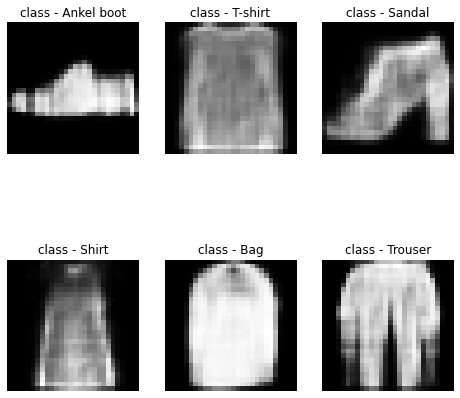

In [20]:
lables = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']
classes = torch.randint(num_classes, size=(1,6)).data[0] # Generate random class
conds = labels_to_one_hots(classes, num_classes).to(device) # Class vector
fig = plt.figure(figsize=(8,8))
model.eval()
samples = model.sample(num_samples=len(classes), x_cond=conds).view(len(classes), 28, 28).data.cpu().numpy()
for i in range(len(classes)):
    ax = fig.add_subplot(2,3,i+1)
    ax.set_title(r'class - {}'.format(lables[int(classes[i])]))
    ax.imshow(samples[i], cmap='gray')
    ax.set_axis_off()

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Question 2 - Conditional VAE
---
1. Can we perform interpolation of the latent space as we did in the tutorial? What is the meaning of doing **in-class** interpolation in the case of Fashion-MNIST? Explain.
2. Why did we convert the the classes number to one-hot vectors? Think of the other inputs to the networks and the values that the neurons accept. What is the risk of using just one number as the condition instead of a vector?
3. How is the quality of the samples? How can the quality be improved? In you answer, refer to the bluriness in the samples.

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution 2 - C-VAE
---
1. C-VAE is different from nornal VAE by the fact that we concatinate the class to the latent space, However the class vector is a {0,1} vector that doesn't overlap at all. With that information we can assume that interpolation is possible, since the latent space isn't different than the usual VAE it can go from one representation to the other, and the class vector will move from one class to the other in phases. One major difference is that we probably won't go from one class to another throgh a third class as seen in the tutorials. Inter-class interpolations will result in the best interpolations since the net won't have to experience a partial class situation, which is better

2. There are several reasons to use a vector repesentation over a single value.
First, vectors have much more weights assosiated with it than a single neuron. a much harder impact to the result will be done with a vectors. Second, KL-divergence. high values in he class will be met with high KL-loss since it is unusual for normal distributaion. Unlike a vector with one's and zero's that fit it perfectly. Lastly, having the classes as a vector allowes us to interpolate without going to other irrelevant classes.

3. Blurriness is a result of poor network design, it can be fixed with choosing the exact size of latent space and hiddent layers (more than 1), morever use of a higher contrast activation function on the last layers can also improve the result. CNN won't necessarily give us better result as the image is so small.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - BONUS - Pokemon: Gotta Generate 'Em All!
---
This is a **non-mandatory**, more challenging task. Come back here only if you are done with the rest of the exercise and want to take on a challenge.

* Note - you should pick one of the following:
    * Fully-connected - work with grayscale images (5 points)
    * Convolutional - work with RGB images (10 points)
* No matter what type of model you chose, you need to answer the bonus questions that follow the code.

In this task we are going to (try) generate new pokemons! Our dataset includes ~900 pokemons. Each sample is a 60x60 image and the type of the pokemon (18 classes). The type is already in one-hot form. If you have access to a GPU, we recommend trying the convolutional version of this task.

Let's look at the data, for the **fully-connected** version.

In [21]:
from pokemon_dataset import PokemonDataset
poke_data = PokemonDataset(root='./data/pokemon', rgb=False)
sample_dataloader = DataLoader(poke_data, batch_size=6, shuffle=True, drop_last=True)

can you name these pokemons?


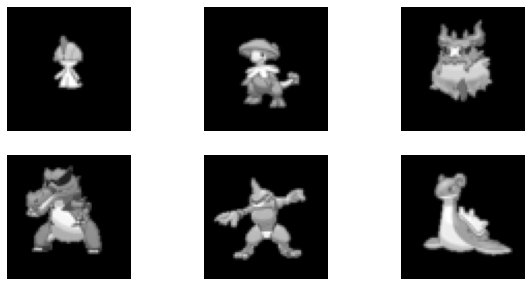

In [22]:
fig = plt.figure(figsize=(10 ,5))
samples, labels = next(iter(sample_dataloader))
for i in range(samples.size(0)):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(samples[i][0].data.cpu().numpy(), cmap="gray")
    
    ax.set_axis_off()
    
print("can you name these pokemons?")

In [23]:
# let's look at the types encoding
poke_data.type_to_one_hot

OrderedDict([('Bug',
              array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Dark',
              array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Dragon',
              array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Electric',
              array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Fairy',
              array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Fighting',
              array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Fire',
              array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.])),
             ('Fl

**The task**: Implement CVAE for the pokemon dataset, it should not be different than the one you implemented for Fashion-MNIST. The task is to define the model and tune the hyper-parameters. 
Note that due to being a really small dataset (only 900 examples!) you will need a really large number of epochs to get something. We don't expect to see actual pokemons, but we want to see the that the networks learned something. You will also need a larger latent space dimension, as pokemons are more complex than cloths.

* If you have taken the **Computer Vision** course - you should add **data augementations** to the images, to create a more diverse dataset. Recommended augmentations: `RandomHorizontalFlip`, `ColorJitter`, random horizontal translation (up to 5 pixels).



* Train CVAE on the pokemon dataset. Save a checkpoint once you are done: `pokemon_beta_(value of beta)_vae_(num epochs)_epochs.pth`.
* Plot samples for at least 6 types of your choosing (try to find the better ones).
* Plot reconstructions for at least 6 types of your choosing.

In [24]:
# your code here - you can use as many cells as you need


### Have access to a GPU and feel adventurous (CNN version)?
* If you have completed the fully-connected verion, you can just skip to the bonus questions.

If you feel creative and want to work with CNNs, we are giving you the VaeCnnEncoder and VaeCnnDecoder architectures, and all you have to do is implement the Vae class using these, and run the VAE with RGB images.
Let's look at the data.

can you name these pokemons?


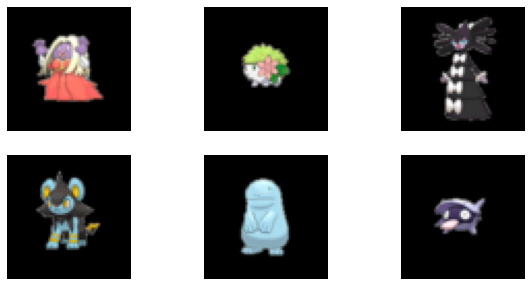

In [25]:
from pokemon_dataset import PokemonDataset
poke_data = PokemonDataset(root='./data/pokemon', rgb=True)
sample_dataloader = DataLoader(poke_data, batch_size=6, shuffle=True, drop_last=True)

fig = plt.figure(figsize=(10 ,5))
samples, labels = next(iter(sample_dataloader))
for i in range(samples.size(0)):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(samples[i].permute(1, 2, 0).data.cpu().numpy())  # permute to (Height, Width, Channels)
    ax.set_axis_off()
    
print("can you name these pokemons?")

### Your Turn
* Impelement the convolutional CVAE and train it. Save a checkpoint `"pokemon_cnn_beta_(value of beta)_vae_(num epochs)_epochs.pth"`
* Plot samples for at least 6 types of your choosing (try to find the better ones).
* Plot reconstructions for at least 6 types of your choosing.


* Note that the call to the loss function in the training loop is in the form: `loss = loss_function(x_recon, x.permute(0, 2, 3, 1), mu, logvar, loss_type='bce', beta=beta)`.
    * This is because `x_recon` is in the shape (batch_size, H, W, C) and `x` is (batch_size, C, H, W).
* Use a lower leraning rate (start with `1e-4`).

* Components:
    * Conv2D - `nn.Conv2d(in_channels, out_channels, kernel_size, stride)`
    * Deconv2d - `nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, output_padding)`
    * Batch Normalization 1D - `nn.BatchNorm1d(num_features, affine=True)`
    * Batch Normalization 2D - `nn.BatchNorm2d(num_features, affine=True)`
    * Calculate the convolutional output size with `_get_conv_out(self, shape)` as in tutorial 8.
    * FC/Linear - `nn.Linear(in, out)`

#### Encoder Architecture - `VaeCnnEncoder(torch.nn.Module)`
* Block 1:
    * Conv2d - `in_channels=3, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding=1`
    * Batch Normalization 2D - 128 features
    * ReLU (or any other activation you want)
* Block 2:
    * Conv2d - `in_channels=128, out_channels=64*4, kernel_size=(3, 3), stride=(2, 2), padding=1`
    * Batch Normalization 2D - $64*4$ features
    * ReLU (or any other activation you want)
* Block 3:
    * Conv2d - `in_channels=64*4, out_channels=64*8, kernel_size=(3, 3), stride=(2, 2), padding=1`
    * Batch Normalization 2D - $64*8$ features
    * ReLU (or any other activation you want)
* FC1 ($\mu$) - `nn.Linear(self._get_conv_out(x_shape) + self.cond_dim, self.z_dim)`
* FC1 ($\Sigma$) - `nn.Linear(self._get_conv_out(x_shape) + self.cond_dim, self.z_dim)`

#### Decoder Architecture - `VaeCnnDecoder(torch.nn.Module)`
* FC1 ($z$) - `nn.Linear(self.z_dim (+cond_dim), 64 * 4 * 4 * 4)`
* Batch Normalization 1D - $64*4*4*4$ features.
* Block 1:
    * Deconv2d - `in_channels=64 * 4, 64 * 2, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1`
    * Batch Normalization 2D - 128 features
    * ReLU (or any other activation you want)
* Block 2:
    * Deconv2d - `in_channels=128, 64, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1`
    * Batch Normalization 2D - 64 features
    * ReLU (or any other activation you want)
* Block 3:
    * Deconv2d - `in_channels=64, 64, kernel_size=(3, 3), stride=(2, 2), padding=2, output_padding=1`
    * Batch Normalization 2D - 64 features
    * ReLU (or any other activation you want)
* Deconv2d - `in_channels=64, 3, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1`
* Sigmoid



In [26]:
# encoder - Q(z|X)
class VaeCNNEncoder(torch.nn.Module):
    """
       This class builds the encoder for the VAE
       :param x_dim: input dimensions
       :param hidden_size: hidden layer size
       :param z_dim: latent dimensions
       :param device: cpu or gpu
       """

    def __init__(self,in_size=60*60, z_dim=32, device=torch.device("cpu")):
        super(VaeCNNEncoder, self).__init__()

        self.z_dim = z_dim
        self.device = device
        
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=128, kernel_size=(3,3), stride=(2,2), padding=1),
            nn.BatchNorm2d(128, affine=True),
            nn.ReLU())
        
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), stride=(2,2), padding=1),
            nn.BatchNorm2d(256, affine=True),
            nn.ReLU())
        
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3,3), stride=(2,2), padding=1),
            nn.BatchNorm2d(512, affine=True),
            nn.ReLU())
        # __getConvOut() fails on my machine
        self.fc1 = nn.Linear(512*8*8, self.z_dim, bias=True)  # fully-connected to output mu
        self.fc2 = nn.Linear(512*8*8, self.z_dim, bias=True)  # fully-connected to output logvar


    def bottleneck(self, h):
        """
        This function takes features from the encoder and outputs mu, log-var and a latent space vector z
        :param h: features from the encoder
        :return: z, mu, log-variance
        """
        mu, logvar = self.fc1(h), self.fc2(h)
        # use the reparametrization trick as torch.normal(mu, logvar.exp()) is not differentiable
        z = reparameterize(mu, logvar, device=self.device)
        return z, mu, logvar

    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        z, mu, logvar = VaeEncoder(X)
        """
        block = nn.Sequential(self.block1, self.block2, self.block3)
        h = block(x)
        h = h.view(h.size(0), -1)
        z, mu, logvar = self.bottleneck(h)
        return z, mu, logvar

    
class VaeCNNDecoder(torch.nn.Module):
    """
       This class builds the decoder for the VAE
       :param x_dim: input dimensions
       :param hidden_size: hidden layer size
       :param z_dim: latent dimensions
       """

    def __init__(self, z_dim=32):
        super(VaeCNNDecoder, self).__init__()
        self.z_dim = z_dim
        
        self.fc = nn.Sequential(nn.Linear(z_dim, 64 * 4 * 4 * 4),
                                 nn.BatchNorm1d(64 * 4 * 4 * 4))
        
        self.block1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64*4, out_channels=64*2, 
                               kernel_size=(3,3), stride=(2,2), padding=1, output_padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        
        self.block2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64*2, out_channels=64, 
                               kernel_size=(3,3), stride=(2,2), padding=1, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        self.block3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=64, 
                               kernel_size=(3,3), stride=(2,2), padding=2, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        self.tail = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=3, 
                               kernel_size=(3,3), stride=(2,2), padding=1, output_padding=1),
            nn.Sigmoid())

    def forward(self, x):
        """
        This is the function called when doing the forward pass:
        x_reconstruction = VaeDecoder(z)
        """
        
        out = self.fc(x)
        
        out = out.view(x.size(0), 64*4, 4, 4)
        out = self.block1(out)
        out = self.block2(out)
        out = self.block3(out)
        res = self.tail(out)

        
        return res
    

class cCNNVae(torch.nn.Module):
    def __init__(self, z_dim=32, device=torch.device("cpu"), cond_dim=18):
        super(cCNNVae, self).__init__()
        self.device = device
        self.z_dim = z_dim

        self.encoder = VaeCNNEncoder(z_dim=z_dim, device=device)
        self.decoder = VaeCNNDecoder(z_dim=z_dim + cond_dim if cond_dim else 0) #Same as C-VAE add the class vector to decoder

    def encode(self, x):
        z, mu, logvar = self.encoder(x)
        return z, mu, logvar

    def decode(self, z):
        x = self.decoder(z)
        return x

    def sample(self, num_samples=1, x_cond=None):
        """
        This functions generates new data by sampling random variables and decoding them.
        Vae.sample() actually generatess new data!
        Sample z ~ N(0,1)
        """
        z = torch.randn(num_samples, self.z_dim).to(self.device)
        if x_cond is not None:
            z = torch.cat([z, x_cond], dim=1)
        return self.decode(z)

    def forward(self, x, x_cond=None):
        """
        This is the function called when doing the forward pass:
        return x_recon, mu, logvar, z = Vae(X)
        """
        z, mu, logvar = self.encode(x)
        if x_cond is not None:
            z = torch.cat([z, x_cond], dim=1)
        x_recon = self.decode(z)
        return x_recon, mu, logvar, z
    

In [27]:
def augment(imgs): # Change to image a little bit to have a better training set
    # Pokemon Dataset Loader doesn't support transforms
    tran = transforms.Compose([transforms.ToPILImage(),
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(15),
                               transforms.ColorJitter(brightness=0.3, contrast=0.2, hue=0.3),
                               transforms.ToTensor()])
    for i in range(len(imgs)):
        imgs[i] = tran(imgs[i])

    return imgs


In [28]:
batch_size = 8
epochs = 250
lr_rate = 0.0001
num_classes = 18

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

poke_data = PokemonDataset(root='./data/pokemon', rgb=True)
poke_dataloader = DataLoader(poke_data, batch_size=batch_size, shuffle=True, drop_last=True)


In [29]:
model = cCNNVae(device=device, z_dim=32).to(device)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr_rate)    
for epoch in range(epochs):
    time_start = time.time()
    err_epoch = []
    optimizer.param_groups[0]['lr'] = lr_rate * (0.87 ** (epoch//10)) # Decrease learning rate every 10 epochs
    for i, batch in enumerate(poke_dataloader):
        x = batch[0].to(device)
        x = augment(x)
        c = batch[1].to(device)
        x_rec, mu, logvar, z = model(x, x_cond=c)
        err_rec, err_kl, err = loss_function(x_rec, x, mu, logvar,loss_type='bce', beta=0.75)        
        err_epoch.append([err_rec, err_kl, err])
            
        optimizer.zero_grad()
        err.backward()
        optimizer.step()
            
    err_rec, err_kl, err = torch.mean(torch.Tensor(err_epoch), 0).data.cpu().numpy()
    print("epoch: {:3d} training loss: {:.5f} epoch time: {:.3f} sec".
            format(epoch, err,time.time() - time_start))
        
    
fname = r'fmnist_beta_1_cvae_{}_epochs.pth'.format(epochs)
torch.save(model.state_dict(), fname)
print("saved checkpoint @", fname)

epoch:   0 training loss: 6440.03320 epoch time: 2.387 sec
epoch:   1 training loss: 4245.46875 epoch time: 2.226 sec
epoch:   2 training loss: 3465.92383 epoch time: 2.256 sec
epoch:   3 training loss: 3085.07788 epoch time: 2.276 sec
epoch:   4 training loss: 2861.34863 epoch time: 2.245 sec
epoch:   5 training loss: 2656.00854 epoch time: 2.278 sec
epoch:   6 training loss: 2567.07544 epoch time: 2.291 sec
epoch:   7 training loss: 2500.94824 epoch time: 2.239 sec
epoch:   8 training loss: 2402.44995 epoch time: 2.289 sec
epoch:   9 training loss: 2333.95728 epoch time: 2.266 sec
epoch:  10 training loss: 2256.48267 epoch time: 2.268 sec
epoch:  11 training loss: 2214.75391 epoch time: 2.286 sec
epoch:  12 training loss: 2209.07495 epoch time: 2.232 sec
epoch:  13 training loss: 2140.17920 epoch time: 2.240 sec
epoch:  14 training loss: 2175.01685 epoch time: 2.238 sec
epoch:  15 training loss: 2135.98120 epoch time: 2.259 sec
epoch:  16 training loss: 2158.47705 epoch time: 2.208 s

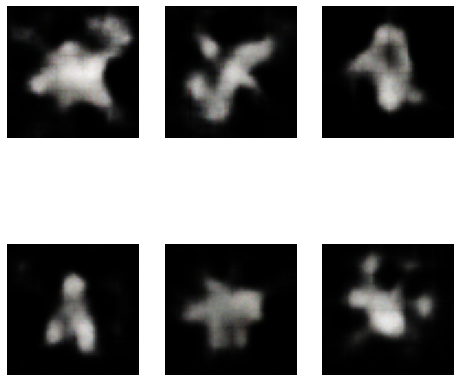

In [30]:
classes = torch.randint(num_classes, size=(1,6)).data[0] # Random classes

conds = labels_to_one_hots(classes, num_classes).to(device)
fig = plt.figure(figsize=(8,8))
model.eval()
samples = model.sample(num_samples=len(classes), x_cond=conds).permute(0,2,3,1).data.cpu().numpy()
for i in range(len(classes)):
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(samples[i])
    ax.set_axis_off()

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Bonus Question
---
1. What do you think about the results on the Pokemon dataset? Name at least 2 reasons for the VAE somewhat low performance on the Pokemon dataest.
2. Suggest ideas to improve the performance (at least 2).

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution 2 - C-VAE
---
1. The results aren't great, it gets the siluet of the new creature well enough, but not the interior. Colors are really muddy and looks like camouflage (maybe the net works great for mimicing the surrounding pokemons, or like real life octopi). Several issues may include: 
  * net architecture, It can be twicked around to get better results (too many deconv layers), and getting layers that can fix colors.
  * Small sample size, the variation of actual pokemons with it's classes and subclasses are really big. Even with augmentions we didn't get enough variations to get them well (unlike clothes pokemons of the same type aren't really similar, maybe only color).

2. We can try getting better results with several possible fixes:
  * Bigger database, mulpitul images of the pokemon from different POV, or wait for a new generation to come up (It happens way too often).
  * having smaller class options, some of them can be combined to get a smaller variation.
  * In-class interpolation of existing pokemons to get a bigger database, without potentially increasing the viriations in the database.
  * Using activation layers that increase contrast instead of blurring. (Tanh)

### <img src="https://img.icons8.com/cotton/64/000000/grand-master-key.png" style="height:50px;display:inline"> Part 2 - Spectral Clustering - Prologue
---
In this task we are going to explore Spectral Clustering for image segmentation. 
In computer vision, **image segmentation** is the process of partitioning a digital image into multiple segments (sets of pixels, also known as image objects). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

We are going tor compare K-Means to Spectral Clustering, and as you recall, K-Means is also a step in the the spectral clustering algorithm (remember where?).

In [31]:
# imports for the exrcise - part 2
# you can add more if you wish (but it is not really needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings

# sklearn imports
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering, KMeans

warnings.filterwarnings(category=UserWarning, action="ignore")

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Question 3 - Spectral Clustering Demonstration
---
Run the next code cell and answer (below the code cell) the following questions:
1. Run the cell 3 times (Ctrl + Enter). Why are the results different in each run?
2. The `image_to_graph` function builds a graph from the image. Explain how the graph is built (you can read the documentation of this function with `help(image.img_to_graph)`. What are the weights of edges?
3. Explain the code commands in lines (press Esc + L to view line numbers): 9, 12

total time: 7.026 sec


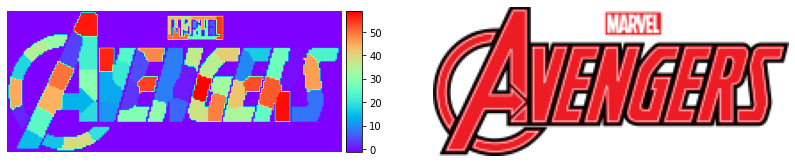

In [32]:
# run this cell
start_time = time.time()
original_img = Image.open("./data/a_logo_s.png")
grayscale_image = original_img.convert("L")  # convert to grayscale
img = np.array(grayscale_image)  # convert to np.array
img[img==255] = 0  # zero-out the background, we don't care about it
mask = img.astype(np.bool)  # create a mask for the graph-building function
img = img.astype(float) / 255  # convert to numbers in [0,1]
img += 1 / 255 + (0.2 / 255) * np.random.randn(*img.shape)  # add random noise

graph = image.img_to_graph(img, mask=mask)  # build a graph with the gradients as weights
graph.data = np.exp(-graph.data / graph.data.std())  # convert gradients to affinity

labels = spectral_clustering(graph, n_clusters=60, eigen_solver='arpack')  # run spectral clustering
label_im = np.full(mask.shape, -1.0)  # labels -> image
label_im[mask] = labels  # assign correct labels

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
imsh = ax1.imshow(label_im, cmap=plt.cm.rainbow)
ax1.set_axis_off()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)
ax2 = fig.add_subplot(122)
ax2.imshow(np.array(original_img))
ax2.set_axis_off()
print("total time: {:.3f} sec".format(time.time() - start_time))

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution 3 - Spectral clustering
---
1. We can see that every clustering is different, it doesn;t change much but changes nontheless. This is caused by the random initial state that can really change the possible outputs.
2. THe graph is built by taking the gradient values of pixels and marking them as the edge on the graph, high gradient sections correspond to edges in the image, thus helping seperating parts of the image.
3. Viewing the code:
  * Line 9: We add a little bit of noise to the image, and move it slightly, thus creating an image that isn't as produced (constant colors) and getting gradients that aren't 0.
  * Line12: We take the graph that is representing the gradient and applying $e^{-graph}$. This takes the difference and flips it. Meaning that similar pixels (grad = 0) will give us high affinity, and edges low affinity and a great spot to break the graph by the clustering algorithm.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Image Segmentation with Spectral Clustering & K-Means
---
1. Run K-Means on `a_logo_s.png`. Tune the number of clusters and number of iterations and plot the results in the same way as in the demonstration.
    * In order to use K-means on images, you need to reshape it: `img.reshape(-1,1)`
    * To run K-Means: create an instance of K-Means: `k_means = KMeans(n_clusters=, max_iter=)` and *fit* the reshaped img: `k_means.fit(...)`
    * To access the labels (=the assignment) of each pixel, call `labels = k_means.labels_`
2. Load `iron_man_p_s.png` and run K-Means and Spectral Clustering. Tune each algorithm's hyper-parameters. Plot the results.

total time: 0.199 sec


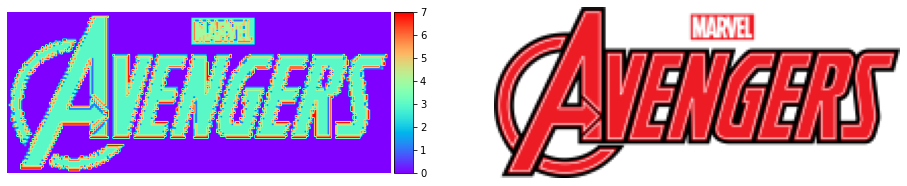

In [34]:
start_time = time.time()


img_flat = np.array(grayscale_image).reshape(-1,1)

k_mean = KMeans(n_clusters=8, max_iter=100)
k_mean.fit(img_flat)

fit = k_mean.labels_.reshape(grayscale_image.size[1],grayscale_image.size[0]) #reshape to fit image

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
imsh = ax1.imshow(fit, cmap=plt.cm.rainbow)
ax1.set_axis_off()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)
ax2 = fig.add_subplot(122)
ax2.imshow(np.array(original_img))
ax2.set_axis_off()
print("total time: {:.3f} sec".format(time.time() - start_time))

total time: 36.920 sec


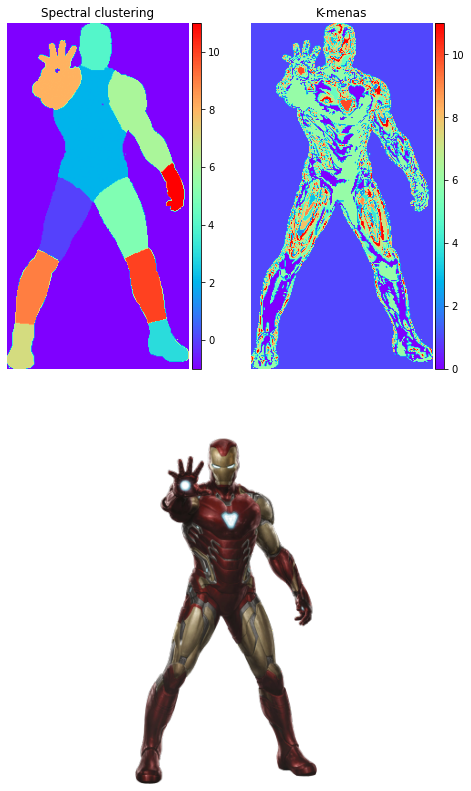

In [35]:
n_clst = 12

start_time = time.time()
original_img = Image.open("./data/iron_man_p_s.png")
grayscale_image = original_img.convert("L")  # convert to grayscale
img = np.array(grayscale_image)  # convert to np.array
img[img==255] = 0  # zero-out the background, we don't care about it
mask = img.astype(np.bool)  # create a mask for the graph-building function
img = img.astype(float) / 255  # convert to numbers in [0,1]
img += 1 / 255 + (0.2 / 255) * np.random.randn(*img.shape)  # add random noise

graph = image.img_to_graph(img, mask=mask)  # build a graph with the gradients as weights
graph.data = np.exp(-graph.data / graph.data.std())  # convert gradients to affinity

labels = spectral_clustering(graph, n_clusters=n_clst, eigen_solver='arpack')  # run spectral clustering
label_im = np.full(mask.shape, -1.0)  # labels -> image
label_im[mask] = labels  # assign correct labels

img_flat = np.array(grayscale_image).reshape(-1,1) # Flatten image

k_mean = KMeans(n_clusters=n_clst, max_iter=100)
k_mean.fit(img_flat) # Fit K-mean on image

fit = k_mean.labels_.reshape(grayscale_image.size[1],grayscale_image.size[0]) # Reshape for image

fig = plt.figure(figsize=(8,14))
ax1 = fig.add_subplot(221)
imsh = ax1.imshow(label_im, cmap=plt.cm.rainbow)
ax1.set_axis_off()
ax1.set_title("Spectral clustering")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)

ax2 = fig.add_subplot(222)
imsh = ax2.imshow(fit, cmap=plt.cm.rainbow)
ax2.set_axis_off()
ax2.set_title("K-menas")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imsh, cax=cax)

ax3 = fig.add_subplot(212)
ax3.imshow(np.array(original_img))
ax3.set_axis_off()

print("total time: {:.3f} sec".format(time.time() - start_time))

### <img src="https://img.icons8.com/bubbles/48/000000/ask-question.png" style="height:50px;display:inline"> Question 4 - Image Segmentation with Spectral Clustering & K-Means
---
1. Compare the results of K-Means and Spectral Clustering on the Avengers logo. Which algoirthm yields more satisfying results, in your opinion? Explain.
2. Compare the results of K-Means and Spectral Clustering on Iron Man. Explain how did you tune the parameters (i.e., how did you pick the number of clusters). What is the difference between the Avengers logo and Iron Man?
3. Summarize the advantages and disadvantages of K-Means and Spectral Clustering for image segmentation (running time, type of images, amount of tuning...)

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution 4 - Image segmentation
---
1. By my value structure I consider K-means as the better option. Since the image is unnatural and had constant colors K-mean is ablr to catch the whole picture better that the more localized image with SC.
2. The Iron man image shows us th realy downside of the K-means algorithm. Here we have a more realistic image (made to look realistic) that has shades of colors, different lighting, and reflections. All of those make K means really hard to work with. On the other hand the Clustering had broke off the character into limbs. We picked the parameter of number of cluster in a way that won't make the fitting process too picky, not every little differnce needs a segment. A balance of differnetiation and simplisity.
3. K-means is very simplictic way to tackle this kind of tasks, unless the image had alot of work done on it no simplify it. It deals well with unnatural images and information that isn't images. Runtime is comparably short 
SC is much better for realistic images and data the is seperable not in a obvious manner. However it is segnificantly slower than K-means.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/